<a href="https://colab.research.google.com/github/amcurley/MeetAbby/blob/master/vid2vid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Colab notebook or tutorial
### [How to run PyTorch with GPU and CUDA 9.2 support on Google Colab](https://www.dlology.com/blog/how-to-run-pytorch-with-gpu-and-cuda-92-support-on-google-colab/)

In [1]:
!python --version

Python 3.6.9


## Install [Cuda 9.2](https://developer.nvidia.com/cuda-downloads?target_os=Linux&target_arch=x86_64&target_distro=Ubuntu&target_version=1710&target_type=deblocal)

In [2]:
!wget https://developer.nvidia.com/compute/cuda/9.2/Prod2/local_installers/cuda-repo-ubuntu1710-9-2-local_9.2.148-1_amd64

--2020-09-15 23:50:08--  https://developer.nvidia.com/compute/cuda/9.2/Prod2/local_installers/cuda-repo-ubuntu1710-9-2-local_9.2.148-1_amd64
Resolving developer.nvidia.com (developer.nvidia.com)... 152.199.16.29
Connecting to developer.nvidia.com (developer.nvidia.com)|152.199.16.29|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://developer.download.nvidia.com/compute/cuda/9.2/secure/Prod2/local_installers/cuda-repo-ubuntu1710-9-2-local_9.2.148-1_amd64.deb?ceAct991V7qQ8Y-MKPI4X_IY-70ac3ZDlZoRQq1oDkB_bTZRbsFLOf2ey1a-IaKk92X4gAdVKrxvShcsTTNOYS33ssI5POvBk7mz4ge-CduZjVmKHdbfA-t3f2VebM8cEUoMnpDvFbwxJovMkgRuywQhtZWhQIPaAfstIcVYBhW_f1GJrFWlcZNI7XfA-taP6j6a1Kvm2pknfC7OTQKO_Q [following]
--2020-09-15 23:50:09--  https://developer.download.nvidia.com/compute/cuda/9.2/secure/Prod2/local_installers/cuda-repo-ubuntu1710-9-2-local_9.2.148-1_amd64.deb?ceAct991V7qQ8Y-MKPI4X_IY-70ac3ZDlZoRQq1oDkB_bTZRbsFLOf2ey1a-IaKk92X4gAdVKrxvShcsTTNOYS33ssI5POvBk7mz4ge-CduZjVmKH

In [3]:
!ls

cuda-repo-ubuntu1710-9-2-local_9.2.148-1_amd64	sample_data


In [4]:
!dpkg -i cuda-repo-ubuntu1710-9-2-local_9.2.148-1_amd64

Selecting previously unselected package cuda-repo-ubuntu1710-9-2-local.
(Reading database ... 144600 files and directories currently installed.)
Preparing to unpack cuda-repo-ubuntu1710-9-2-local_9.2.148-1_amd64 ...
Unpacking cuda-repo-ubuntu1710-9-2-local (9.2.148-1) ...
Setting up cuda-repo-ubuntu1710-9-2-local (9.2.148-1) ...


In [5]:

!ls /var/ | grep cuda-repo

cuda-repo-9-2-local


In [6]:
!apt-key add /var/cuda-repo-9-2-local/7fa2af80.pub

OK


In [7]:
!apt-get update

Get:1 file:/var/cuda-repo-9-2-local  InRelease
Ign:1 file:/var/cuda-repo-9-2-local  InRelease
Get:2 file:/var/cuda-repo-9-2-local  Release [574 B]
Get:2 file:/var/cuda-repo-9-2-local  Release [574 B]
Get:3 file:/var/cuda-repo-9-2-local  Release.gpg [801 B]
Get:3 file:/var/cuda-repo-9-2-local  Release.gpg [801 B]
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:5 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:6 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:7 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.4 kB]
Get:8 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Get:9 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:10 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:11 file:/var/cuda-repo-9-2-local  Packages [18.8 kB]
Ign:12 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:13 h

In [8]:
!apt-get install cuda

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  cuda-11-0 cuda-command-line-tools-11-0 cuda-compiler-11-0 cuda-cudart-11-0
  cuda-cudart-dev-11-0 cuda-cuobjdump-11-0 cuda-cupti-11-0 cuda-cupti-dev-11-0
  cuda-demo-suite-11-0 cuda-documentation-11-0 cuda-driver-dev-11-0
  cuda-gdb-11-0 cuda-libraries-11-0 cuda-libraries-dev-11-0 cuda-memcheck-11-0
  cuda-nsight-11-0 cuda-nsight-compute-11-0 cuda-nsight-systems-11-0
  cuda-nvcc-11-0 cuda-nvdisasm-11-0 cuda-nvml-dev-11-0 cuda-nvprof-11-0
  cuda-nvprune-11-0 cuda-nvrtc-11-0 cuda-nvrtc-dev-11-0 cuda-nvtx-11-0
  cuda-nvvp-11-0 cuda-runtime-11-0 cuda-samples-11-0 cuda-sanitizer-11-0
  cuda-toolkit-11-0 cuda-tools-11-0 cuda-visual-tools-11-0 libcublas-11-0
  libcublas-dev-11-0 libcufft-11-0 libcufft-dev-11-0 libcurand-11-0
  libcurand-dev-11-0 libcusolver-11-0 libcusolver-dev-11-0 libcusparse-11-0
  libcusparse-dev-11-0 libnpp-11-0 libnpp-dev

## Install [PyTorch](https://pytorch.org/) with Cuda 9.2 support

In [9]:
!pip install http://download.pytorch.org/whl/cu92/torch-0.4.1-cp36-cp36m-linux_x86_64.whl 
!pip install torchvision

     |████████████████████████████████| 512.6MB 1.1MB/s 
ERROR: torchvision 0.7.0+cu101 has requirement torch==1.6.0, but you'll have torch 0.4.1 which is incompatible.
ERROR: fastai 1.0.61 has requirement torch>=1.0.0, but you'll have torch 0.4.1 which is incompatible.
  Found existing installation: torch 1.6.0+cu101
    Uninstalling torch-1.6.0+cu101:
      Successfully uninstalled torch-1.6.0+cu101
     |████████████████████████████████| 748.8MB 22kB/s 
  Found existing installation: torch 0.4.1
    Uninstalling torch-0.4.1:
      Successfully uninstalled torch-0.4.1


## Get the [Vid2vid](https://github.com/NVIDIA/vid2vid) project
Pytorch implementation of our method for high-resolution (e.g. 2048x1024) photorealistic video-to-video translation.

In [10]:
!git clone https://github.com/NVIDIA/vid2vid

Cloning into 'vid2vid'...
remote: Enumerating objects: 1030, done.
remote: Total 1030 (delta 0), reused 0 (delta 0), pack-reused 1030
Receiving objects: 100% (1030/1030), 168.36 MiB | 23.89 MiB/s, done.
Resolving deltas: 100% (279/279), done.


In [11]:
import os
os.chdir('./vid2vid')

In [12]:
!pip install dominate requests

In [13]:
!python scripts/download_flownet2.py

Streaming output truncated to the last 5000 lines.
                 from /usr/local/lib/python3.6/dist-packages/torch/include/torch/csrc/api/include/torch/data.h:3,
                 from /usr/local/lib/python3.6/dist-packages/torch/include/torch/csrc/api/include/torch/all.h:4,
                 from /usr/local/lib/python3.6/dist-packages/torch/include/torch/csrc/api/include/torch/torch.h:3,
                 from channelnorm_cuda.cc:1:
/usr/local/lib/python3.6/dist-packages/torch/include/ATen/core/interned_strings.h:81:11: note:   ‘c10::aten::str’
   _(aten, str)                       \
           ^
/usr/local/lib/python3.6/dist-packages/torch/include/ATen/core/interned_strings.h:414:35: note: in definition of macro ‘DEFINE_SYMBOL’
   namespace ns { constexpr Symbol s(static_cast<unique_t>(_keys::ns##_##s)); }
                                   ^
/usr/local/lib/python3.6/dist-packages/torch/include/ATen/core/interned_strings.h:415:1: note: in expansion of macro ‘FORALL_NS_SYMBOLS’
 FORAL

In [ ]:
!python scripts/download_models.py

In [ ]:
!python test.py --name label2city_2048 --dataroot datasets/Cityscapes/test_A --loadSize 2048 --n_scales_spatial 3 --use_instance --fg --use_single_G

------------ Options -------------
aspect_ratio: 1.0
batchSize: 1
checkpoints_dir: ./checkpoints
dataroot: datasets/Cityscapes/test_A
dataset_mode: temporal
debug: False
display_id: 0
display_winsize: 512
feat_num: 3
fg: True
fg_labels: [26]
fineSize: 512
gpu_ids: [0]
how_many: 300
input_nc: 3
isTrain: False
label_feat: False
label_nc: 35
loadSize: 2048
load_features: False
load_pretrain: 
max_dataset_size: inf
model: vid2vid
nThreads: 2
n_blocks: 9
n_blocks_local: 3
n_downsample_E: 3
n_downsample_G: 3
n_frames_G: 3
n_gpus_gen: 1
n_local_enhancers: 1
n_scales_spatial: 3
name: label2city_2048
ndf: 64
nef: 32
netE: simple
netG: composite
ngf: 128
no_first_img: False
no_flip: False
norm: batch
ntest: inf
output_nc: 3
phase: test
resize_or_crop: scaleWidth
results_dir: ./results/
serial_batches: False
tf_log: False
use_instance: True
use_real_img: False
use_single_G: True
which_epoch: latest
-------------- End ----------------
CustomDatasetDataLoader
dataset [TestDataset] was created
vid2v

In [14]:
!python scripts/face/download_models.py

In [15]:
!python test.py --name edge2face_512 --dataroot datasets/face/ --dataset_mode face --input_nc 15 --loadSize 512 --use_single_G


Traceback (most recent call last):
  File "test.py", line 15, in <module>
    opt = TestOptions().parse(save=False)
  File "/content/vid2vid/options/base_options.py", line 109, in parse
    torch.cuda.set_device(self.opt.gpu_ids[0])
  File "/usr/local/lib/python3.6/dist-packages/torch/cuda/__init__.py", line 281, in set_device
    torch._C._cuda_setDevice(device)
  File "/usr/local/lib/python3.6/dist-packages/torch/cuda/__init__.py", line 186, in _lazy_init
    _check_driver()
  File "/usr/local/lib/python3.6/dist-packages/torch/cuda/__init__.py", line 77, in _check_driver
    of the CUDA driver.""".format(str(torch._C._cuda_getDriverVersion())))
AssertionError: 
The NVIDIA driver on your system is too old (found version 10010).
Please update your GPU driver by downloading and installing a new
version from the URL: http://www.nvidia.com/Download/index.aspx
Alternatively, go to: https://pytorch.org to install
a PyTorch version that has been compiled with your version
of the CUDA driver.

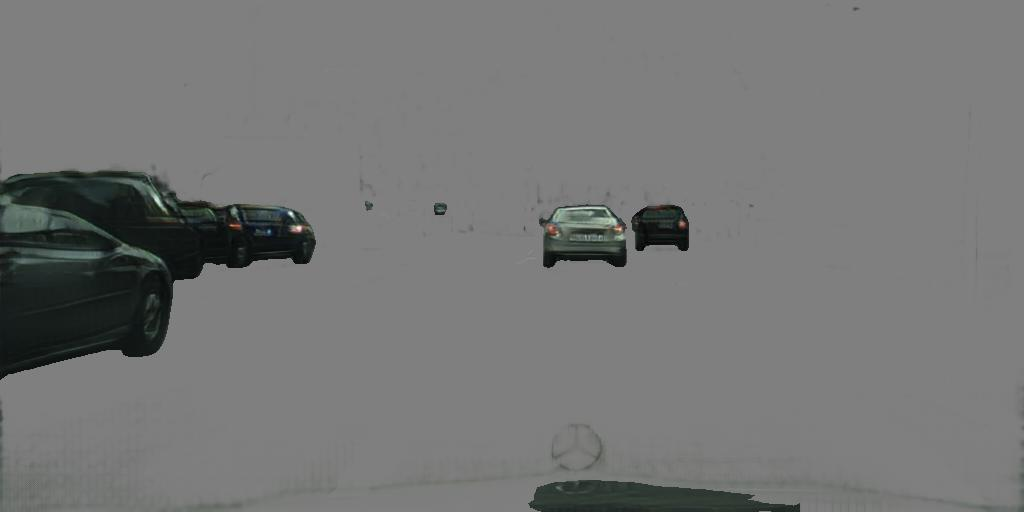

In [ ]:
from IPython.display import Image
Image(filename='results/label2city_1024_g1/test_latest/images/fake_B_stuttgart_00_000000_000003_leftImg8bit.jpg') 

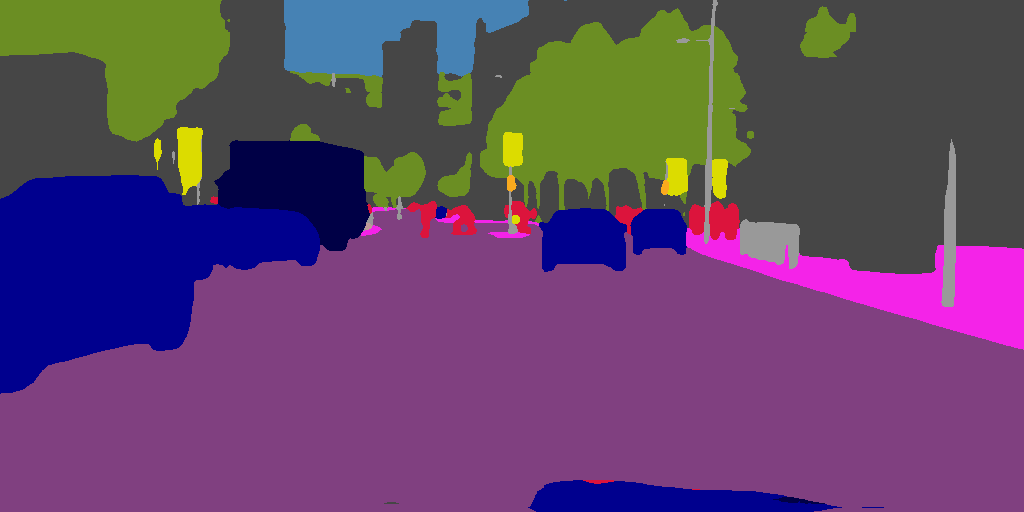

In [ ]:
Image(filename='results/label2city_1024_g1/test_latest/images/real_A_stuttgart_00_000000_000003_leftImg8bit.png')

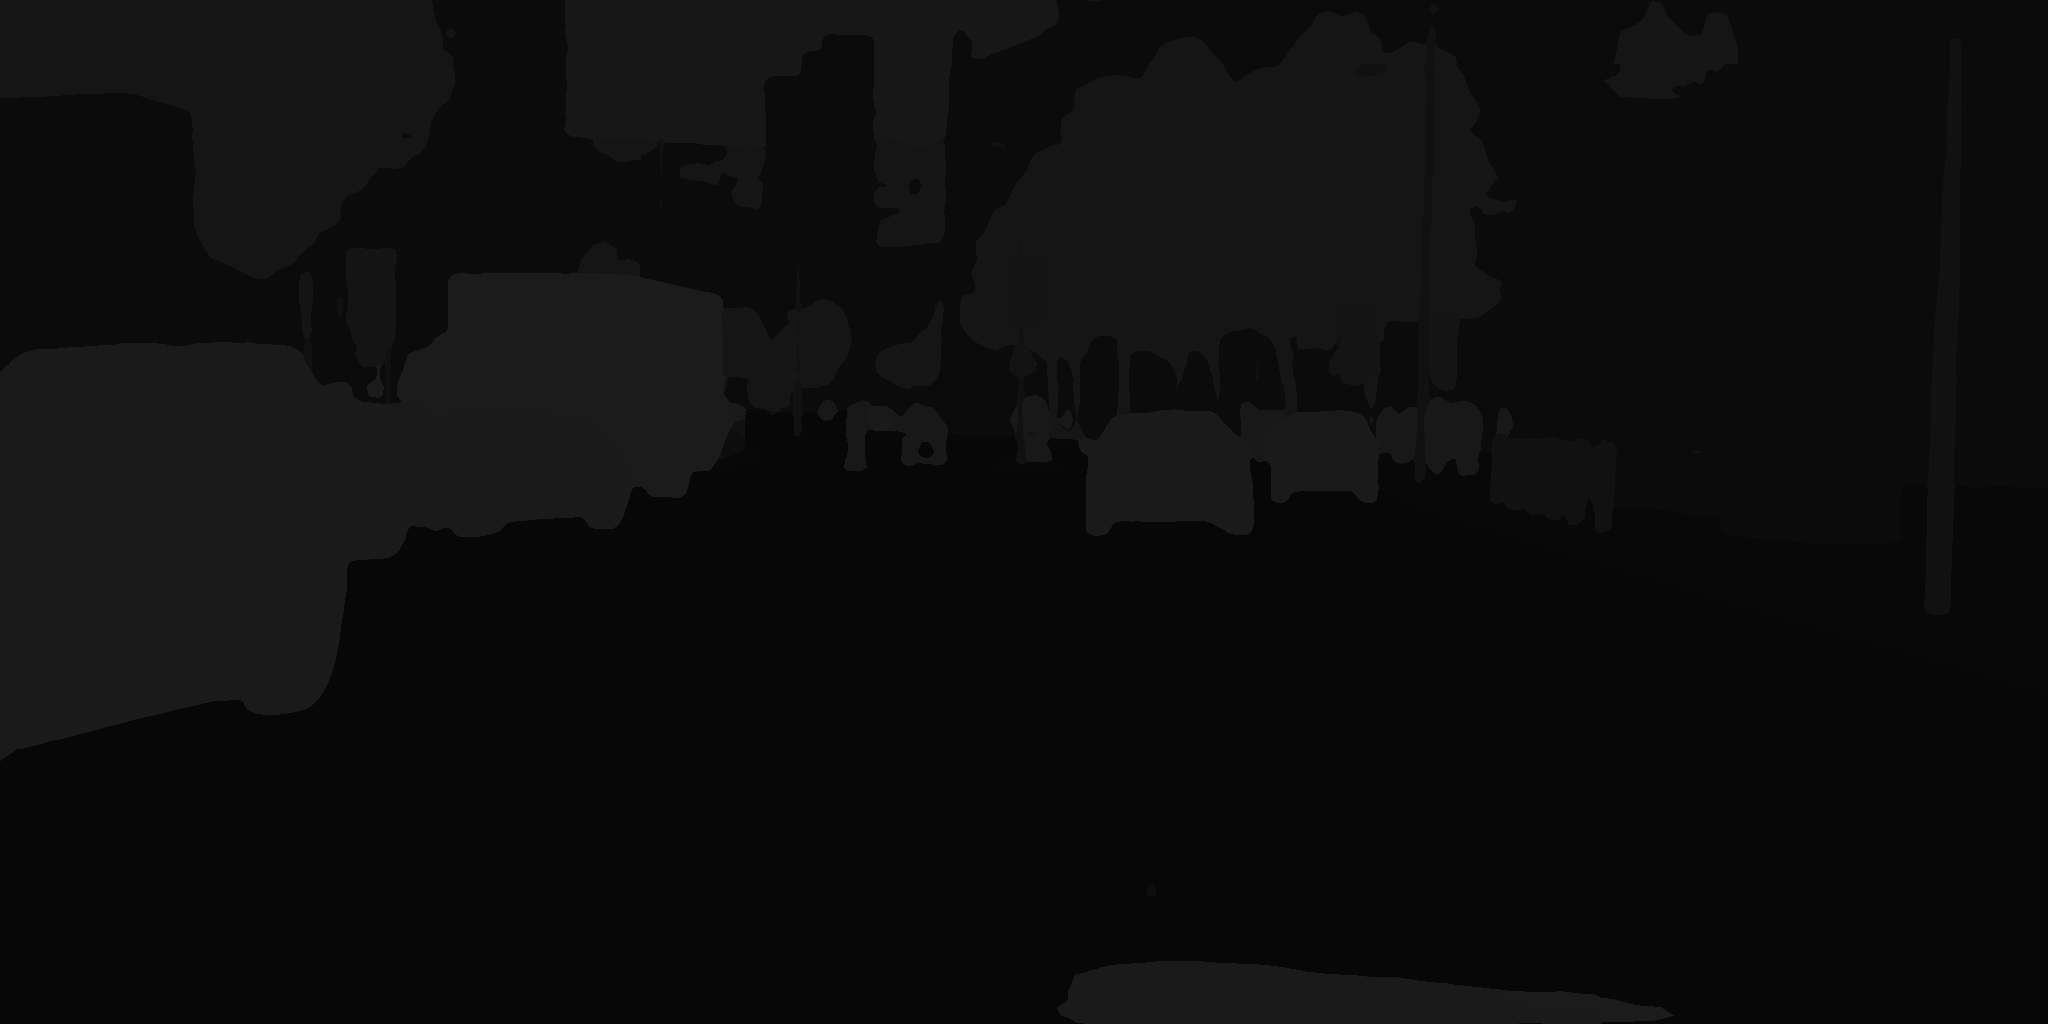

In [ ]:
Image(filename='datasets/Cityscapes/test_A/stuttgart_00/stuttgart_00_000000_000003_leftImg8bit.png')

## [CUDA Toolkit 9.0 Downloads](https://developer.nvidia.com/cuda-90-download-archive?target_os=Linux&target_arch=x86_64&target_distro=Ubuntu&target_version=1704&target_type=deblocal) 
You don't have to try.

In [ ]:
!wget https://developer.nvidia.com/compute/cuda/9.0/Prod/local_installers/cuda-repo-ubuntu1704-9-0-local_9.0.176-1_amd64-deb


Redirecting output to ‘wget-log’.


In [ ]:
!ls

cuda-repo-ubuntu1704-9-0-local_9.0.176-1_amd64-deb  vid2vid
sample_data					    wget-log


In [ ]:
!dpkg -i cuda-repo-ubuntu1704-9-0-local_9.0.176-1_amd64-deb

Selecting previously unselected package cuda-repo-ubuntu1704-9-0-local.
(Reading database ... 18408 files and directories currently installed.)
Preparing to unpack cuda-repo-ubuntu1704-9-0-local_9.0.176-1_amd64-deb ...
Unpacking cuda-repo-ubuntu1704-9-0-local (9.0.176-1) ...
Setting up cuda-repo-ubuntu1704-9-0-local (9.0.176-1) ...

The public CUDA GPG key does not appear to be installed.
To install the key, run this command:
sudo apt-key add /var/cuda-repo-9-0-local/7fa2af80.pub



In [ ]:
!ls /var/cuda-repo-9-0-local | grep .pub

7fa2af80.pub


In [ ]:
!apt-key add /var/cuda-repo-9-0-local/7fa2af80.pub

OK


In [ ]:
!apt-get update

Get:1 file:/var/cuda-repo-9-0-local  InRelease
Ign:1 file:/var/cuda-repo-9-0-local  InRelease
Get:2 file:/var/cuda-repo-9-0-local  Release [574 B]
Get:2 file:/var/cuda-repo-9-0-local  Release [574 B]
Get:3 file:/var/cuda-repo-9-0-local  Release.gpg [819 B]
Get:3 file:/var/cuda-repo-9-0-local  Release.gpg [819 B]
Hit:4 http://archive.ubuntu.com/ubuntu artful InRelease
Hit:5 http://security.ubuntu.com/ubuntu artful-security InRelease
Hit:6 http://archive.ubuntu.com/ubuntu artful-updates InRelease
Hit:7 http://archive.ubuntu.com/ubuntu artful-backports InRelease
Get:8 file:/var/cuda-repo-9-0-local  Packages [15.8 kB]
Reading package lists... Done


In [ ]:
!apt-get install cuda

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  accountsservice acpid activity-log-manager adwaita-icon-theme apg aspell
  aspell-en at-spi2-core avahi-daemon avahi-utils bbswitch-dkms bind9-host
  bluez bluez-obexd bsdmainutils ca-certificates-java cheese-common
  cracklib-runtime crda cuda-9-0 cuda-command-line-tools-9-0 cuda-core-9-0
  cuda-cublas-9-0 cuda-cublas-dev-9-0 cuda-cudart-9-0 cuda-cudart-dev-9-0
  cuda-cufft-9-0 cuda-cufft-dev-9-0 cuda-curand-9-0 cuda-curand-dev-9-0
  cuda-cusolver-9-0 cuda-cusolver-dev-9-0 cuda-cusparse-9-0
  cuda-cusparse-dev-9-0 cuda-demo-suite-9-0 cuda-documentation-9-0
  cuda-driver-dev-9-0 cuda-drivers cuda-libraries-9-0 cuda-libraries-dev-9-0
  cuda-license-9-0 cuda-misc-headers-9-0 cuda-npp-9-0 cuda-npp-dev-9-0
  cuda-nvgraph-9-0 cuda-nvgraph-dev-9-0 cuda-nvml-dev-9-0 cuda-nvrtc-9-0
  cuda-nvrtc-dev-9-0 cuda-runtime-9-0 cuda-samples-9-0 cuda-tool

### Install [PyTorch](https://pytorch.org/) with CUDA 9.0 support
Use CUDA 9.2 instead if you want to compile cuda extensions, refer to the [topic](https://devtalk.nvidia.com/default/topic/1028112/cuda-setup-and-installation/nvcc-bug-related-to-gcc-6-lt-tuple-gt-header-/post/5260762/#5260762).

In [ ]:
!pip install torch torchvision

    100% |████████████████████████████████| 519.5MB 36kB/s 
tcmalloc: large alloc 1073750016 bytes == 0x585f6000 @  0x7f276d56d1c4 0x46d6a4 0x5fcbcc 0x4c494d 0x54f3c4 0x553aaf 0x54e4c8 0x54f4f6 0x553aaf 0x54efc1 0x54f24d 0x553aaf 0x54efc1 0x54f24d 0x553aaf 0x54efc1 0x54f24d 0x551ee0 0x54e4c8 0x54f4f6 0x553aaf 0x54efc1 0x54f24d 0x551ee0 0x54efc1 0x54f24d 0x551ee0 0x54e4c8 0x54f4f6 0x553aaf 0x54e4c8
    100% |████████████████████████████████| 61kB 21.4MB/s 
    100% |████████████████████████████████| 2.0MB 4.5MB/s 
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0


#### Install GCC version 6 to compile cuda extensions

In [ ]:
!apt update
!apt install build-essential software-properties-common -y
!add-repository ppa:ubuntu-toolchain-r/test -y
!apt update
!apt install gcc-6 g++-6 -y
!update-alternatives --install /usr/bin/gcc gcc /usr/bin/gcc-6 60 --slave /usr/bin/g++ g++ /usr/bin/g++-6
!gcc -v

Reading package lists... Done
Building dependency tree       
Reading state information... Done
gcc-6 is already the newest version (6.4.0-8ubuntu1).
g++-6 is already the newest version (6.4.0-8ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.
update-alternatives: using /usr/bin/gcc-6 to provide /usr/bin/gcc (gcc) in auto mode
Using built-in specs.
COLLECT_GCC=gcc
COLLECT_LTO_WRAPPER=/usr/lib/gcc/x86_64-linux-gnu/6/lto-wrapper
Target: x86_64-linux-gnu
Configured with: ../src/configure -v --with-pkgversion='Ubuntu 6.4.0-8ubuntu1' --with-bugurl=file:///usr/share/doc/gcc-6/README.Bugs --enable-languages=c,ada,c++,java,go,d,fortran,objc,obj-c++ --prefix=/usr --program-suffix=-6 --program-prefix=x86_64-linux-gnu- --enable-shared --enable-linker-build-id --libexecdir=/usr/lib --without-included-gettext --enable-threads=posix --libdir=/usr/lib --enable-nls --with-sysroot=/ --enable-clocale=gnu --enable-libstdcxx-debug --enable-libstdcxx-time=yes --with-default-libstdcxx

In [ ]:
!update-alternatives --install /usr/bin/g++ g++ /usr/bin/g++-6 10

update-alternatives: error: alternative g++ can't be master: it is a slave of gcc


In [ ]:
!update-alternatives --install /usr/bin/gcc gcc /usr/bin/gcc-6 10

update-alternatives: using /usr/bin/gcc-5 to provide /usr/bin/gcc (gcc) in auto mode


In [ ]:
!gcc -v

Using built-in specs.
COLLECT_GCC=gcc
COLLECT_LTO_WRAPPER=/usr/lib/gcc/x86_64-linux-gnu/6/lto-wrapper
Target: x86_64-linux-gnu
Configured with: ../src/configure -v --with-pkgversion='Ubuntu 6.4.0-8ubuntu1' --with-bugurl=file:///usr/share/doc/gcc-6/README.Bugs --enable-languages=c,ada,c++,java,go,d,fortran,objc,obj-c++ --prefix=/usr --program-suffix=-6 --program-prefix=x86_64-linux-gnu- --enable-shared --enable-linker-build-id --libexecdir=/usr/lib --without-included-gettext --enable-threads=posix --libdir=/usr/lib --enable-nls --with-sysroot=/ --enable-clocale=gnu --enable-libstdcxx-debug --enable-libstdcxx-time=yes --with-default-libstdcxx-abi=new --enable-gnu-unique-object --disable-vtable-verify --enable-libmpx --enable-plugin --enable-default-pie --with-system-zlib --disable-browser-plugin --enable-java-awt=gtk --enable-gtk-cairo --with-java-home=/usr/lib/jvm/java-1.5.0-gcj-6-amd64/jre --enable-java-home --with-jvm-root-dir=/usr/lib/jvm/java-1.5.0-gcj-6-amd64 --with-jvm-jar-dir=/us